In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/data_syd/badgery_1h.csv'

In [4]:
df = pd.read_csv(data)

# Step 2: Display column names to choose the correct one
print("Columns in dataset:", df.columns)

# Assuming the precipitation column is named 'precip' — replace if different
data_column = 'Precipitation'  # change this to match the correct column in your CSV

Columns in dataset: Index(['Time', 'Precipitation'], dtype='object')


In [13]:
# Step 3: Drop missing values and apply the filter p > 0.2
data = df[data_column].dropna()
filtered_data = data[data > 0.2]

# Step 4: Calculate the 95th percentile
percentile_95 = np.percentile(filtered_data, 95)
extreme_data = filtered_data[filtered_data > percentile_95]

print(f"95th percentile (p > 0.2 mm): {percentile_95:.2f}")
print(f"Number of values above 95th percentile: {len(extreme_data)}")


95th percentile (p > 0.2 mm): 6.40
Number of values above 95th percentile: 310


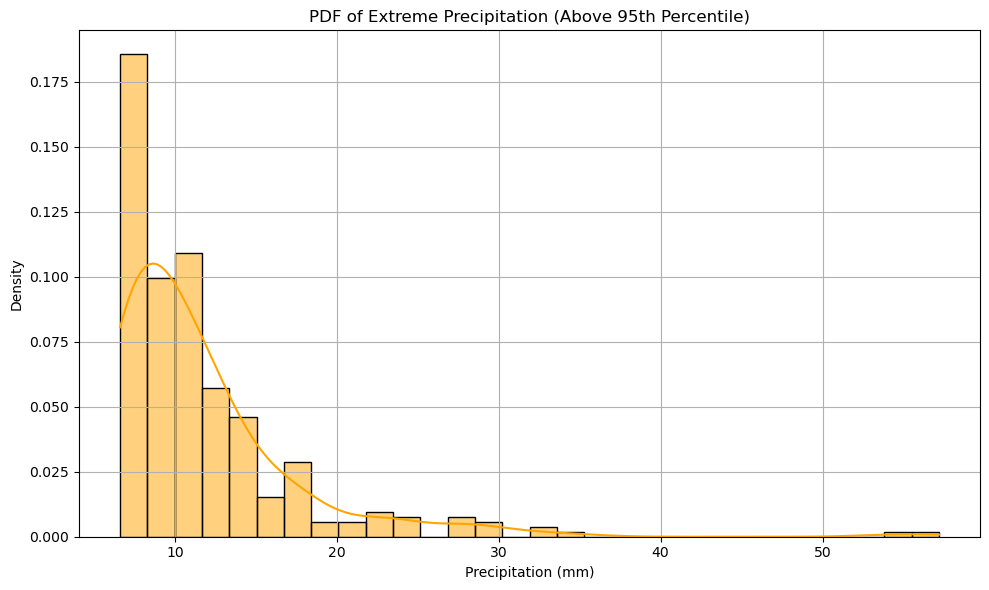

In [14]:
# Step 5: Plot PDF of values > 95th percentile
plt.figure(figsize=(10, 6))
sns.histplot(extreme_data, kde=True, stat="density", bins=30, color='orange', edgecolor='black')
plt.title("PDF of Extreme Precipitation (Above 95th Percentile)")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()